In [98]:
from math import sqrt
import numpy as np
import pandas as pd
import random
import warnings
from matplotlib import pyplot as plt
from matplotlib import style
from collections import Counter
style.use('fivethirtyeight')

#### Before checking on cancer data, let's create a dummy data and check for it

In [53]:
dataset = {'black': [[1,2], [2,3], [3,1]], 'red': [[6,5], [7,7], [8,6]]}

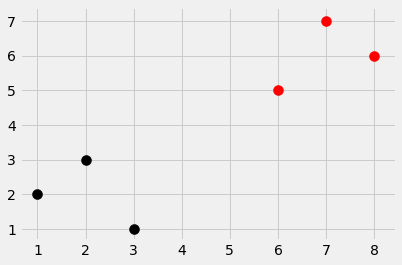

In [54]:
[plt.scatter(item[0], item[1], s=100, color=i) for i in dataset for item in dataset[i]]

#### KNN algorithm

In [104]:
def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total classification groups')
    distances = []
    for group in data:
        for feature in data[group]:
            euclidian_distance = np.linalg.norm(np.array(feature) - np.array(predict))
            distances.append([euclidian_distance, group])
    votes = [i[1] for i in sorted(distances)[:k]]
    vote_result = Counter(votes).most_common(1)[0][0]
    
    confidence = Counter(votes).most_common(1)[0][1] / k
    
    return vote_result, confidence


#### Let us predict for new features and visualize

In [105]:
new_features = [5,7]
result = k_nearest_neighbors(dataset, new_features, k=3)
result

('red', 1.0)

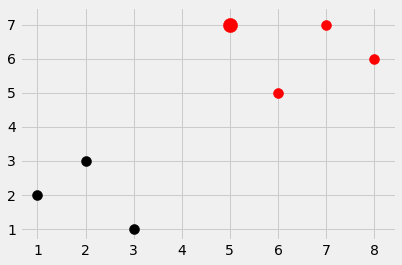

In [107]:
[plt.scatter(item[0], item[1], s=100, color=i) for i in dataset for item in dataset[i]]
plt.scatter(new_features[0], new_features[1], s=200, color=result[0]);

#### Now let's test on the breast cancer dataset

In [66]:
columns = ['id', 'clump_thickness', 'unif_cell_size', 'unif_cell_shape', 'marg_adhesion',
           'single_epith_cell_size', 'bare_nuclei', 'bland_chrom', 'norm_nucleoli', 'mitoses', 'class']
df = pd.read_csv('./KNN_ML_Model_BreastCancer/breast-cancer-wisconsin.data', header=None, names=columns)
df.head()

,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


#### Data exploration

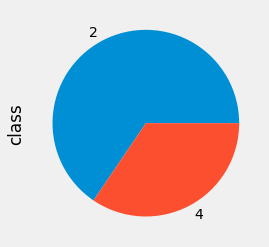

In [74]:
# Check for available no. of classes i.e. labels
df['class'].value_counts().plot(kind='pie');

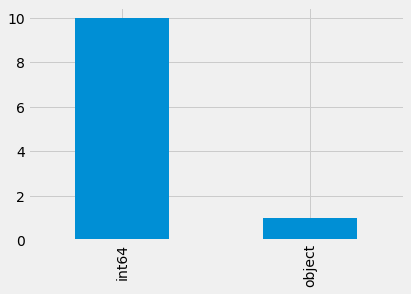

In [84]:
# Let's check for all the data types present
df.dtypes.value_counts().plot(kind='bar');

In [88]:
# As per the documentation, missing values are '?' in the dataset
# Let us find columns with the missing values
df.apply(lambda col: col == '?').sum()

id                         0
clump_thickness            0
unif_cell_size             0
unif_cell_shape            0
marg_adhesion              0
single_epith_cell_size     0
bare_nuclei               16
bland_chrom                0
norm_nucleoli              0
mitoses                    0
class                      0
dtype: int64

In [89]:
# Replace all the missing values with outliers
df.replace('?', -99999, inplace=True)

#### Feature engineering

In [92]:
# id column is not useful for the model predictions, for obvious reasons
# All other columns are features and one column is the class i.e. the label
df.drop('id', axis=1, inplace=True)

#### Split the training and test data

In [97]:
# Convert the data type as 'float' and create list of values from df
full_data = df.astype('float').values.tolist()

In [99]:
# Shuffle the data
random.shuffle(full_data)

In [101]:
# Populate the training and test data dictionaries
test_size = 0.2
train_set = {2: [], 4:[]}
test_set = {2: [], 4: []}
train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

for i in train_data:
    train_set[i[-1]].append(i[:-1])
    
for i in test_data:
    test_set[i[-1]].append(i[:-1])

#### Predict the class for test data and calculate the accuracy

In [110]:
correct, total = 0, 0

for group in test_set:
    for data in test_set[group]:
        vote, confidence = k_nearest_neighbors(train_set, data, k=5)
        if vote == group:
            correct += 1
        else:
            print(f'Confidence for incorrect prediction: {confidence}')
        total += 1

print(f'\nAccuracy: {correct/total}')

Confidence for incorrect prediction: 0.6
Confidence for incorrect prediction: 0.8
Confidence for incorrect prediction: 0.6
Confidence for incorrect prediction: 1.0

Accuracy: 0.9712230215827338


#### Effect of reduction in test size on confidence on predictions

In [111]:
# NOTE that increase in test_size will DECREASE the confidence level

In [112]:
# Populate the training and test data dictionaries
test_size = 0.4
train_set = {2: [], 4:[]}
test_set = {2: [], 4: []}
train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

for i in train_data:
    train_set[i[-1]].append(i[:-1])
    
for i in test_data:
    test_set[i[-1]].append(i[:-1])
    
correct, total = 0, 0

for group in test_set:
    for data in test_set[group]:
        vote, confidence = k_nearest_neighbors(train_set, data, k=5)
        if vote == group:
            correct += 1
        else:
            print(f'Confidence for incorrect prediction: {confidence}')
        total += 1

print(f'\nAccuracy: {correct/total}')

Confidence for incorrect prediction: 0.8
Confidence for incorrect prediction: 0.6
Confidence for incorrect prediction: 0.8
Confidence for incorrect prediction: 1.0
Confidence for incorrect prediction: 0.6
Confidence for incorrect prediction: 0.6
Confidence for incorrect prediction: 0.8
Confidence for incorrect prediction: 0.6
Confidence for incorrect prediction: 0.6
Confidence for incorrect prediction: 0.8

Accuracy: 0.96415770609319
